In [4]:

from google.colab import files
import pandas as pd

uploaded = files.upload()

ModuleNotFoundError: No module named 'google'

In [ ]:
import pandas as pd
df = pd.read_excel("bank_additional_analysis.xlsx")

In [ ]:
print("Shape:", df.shape)
print("Columns:", df.columns.tolist())
print(df.dtypes)

Shape: (40706, 25)
Columns: ['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'deposit', 'balance_per_call', 'age_group', 'duration_category', 'customer_segment']
age                    int64
job                   object
marital               object
education             object
default               object
housing               object
loan                  object
contact               object
month                 object
day_of_week           object
duration               int64
campaign               int64
pdays                  int64
previous               int64
poutcome              object
emp.var.rate         float64
cons.price.idx       float64
cons.conf.idx        float64
euribor3m            float64
nr.employed          float64
deposit                int64
balance_per_call     float64
age_group

deposit
0    36288
1     4418
Name: count, dtype: int64
deposit
0    89.15
1    10.85
Name: proportion, dtype: float64


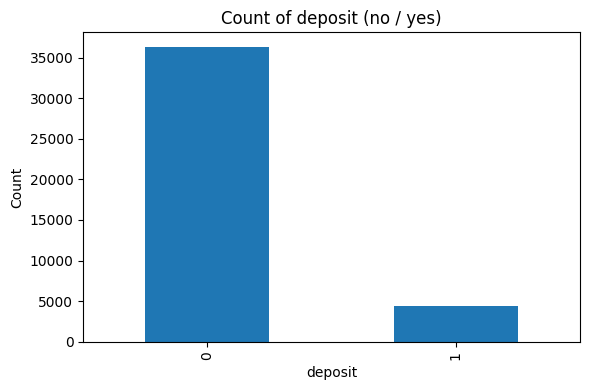

In [ ]:

vc = df['deposit'].value_counts()
vc_pct = df['deposit'].value_counts(normalize=True) * 100
print(vc)
print(vc_pct.round(2))

import matplotlib.pyplot as plt
plt.figure(figsize=(6,4))
vc.plot(kind='bar')
plt.title('Count of deposit (no / yes)')
plt.ylabel('Count')
plt.tight_layout()
plt.show()

deposit                0          1
job                                
student        68.571429  31.428571
retired        81.538462  18.461538
unemployed     85.798817  14.201183
admin.         87.152972  12.847028
management     88.896504  11.103496
technician     89.180766  10.819234
self-employed  89.507042  10.492958
housemaid      90.917874   9.082126
entrepreneur   91.483516   8.516484
services       91.857827   8.142173
blue-collar    93.112769   6.887231


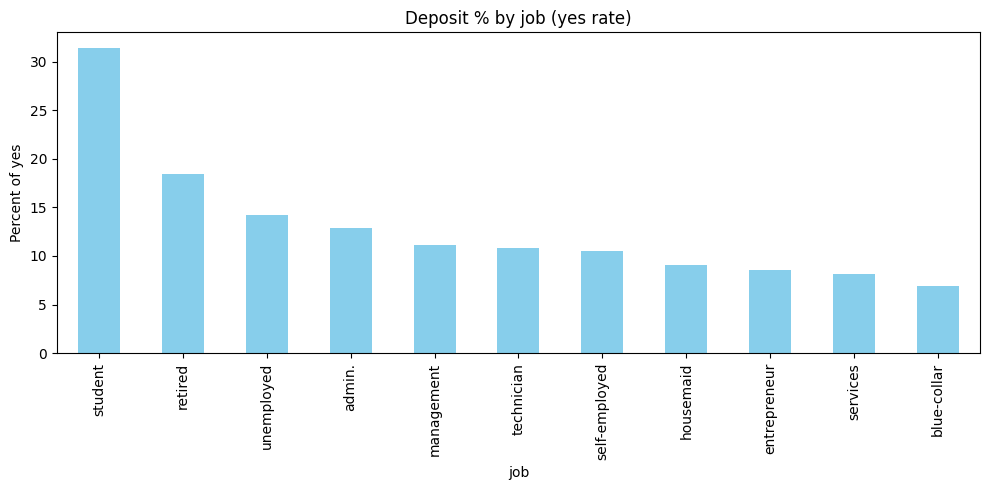

In [ ]:

job_rate = df.groupby('job')['deposit'].value_counts(normalize=True).unstack().fillna(0) * 100
job_rate_sorted = job_rate.sort_values(by=1, ascending=False)
print(job_rate_sorted)

import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
job_rate_sorted[1].plot(kind='bar', color='skyblue')
plt.title('Deposit % by job (yes rate)')
plt.ylabel('Percent of yes')
plt.tight_layout()
plt.show()

In [ ]:
print(df['deposit'].unique())

[0 1]


deposit                      0          1
education                                
illiterate           82.352941  17.647059
university.degree    86.468838  13.531162
professional.course  88.957291  11.042709
high.school          89.248787  10.751213
basic.6y             91.966637   8.033363
basic.4y             92.170819   7.829181
basic.9y             92.256564   7.743436


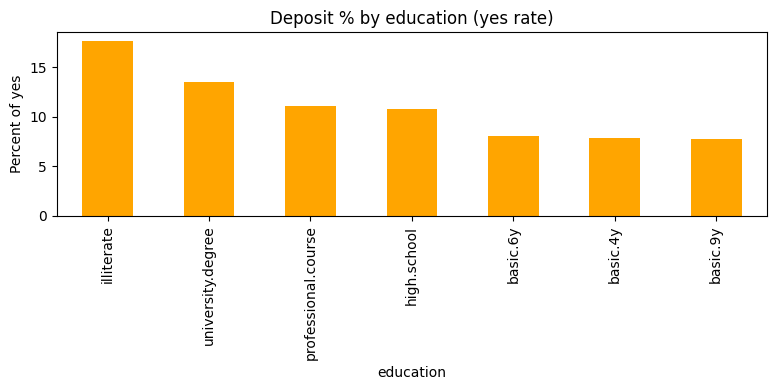

In [ ]:

edu_rate = df.groupby('education')['deposit'].value_counts(normalize=True).unstack().fillna(0) * 100
edu_rate_sorted = edu_rate.sort_values(by=1, ascending=False)
print(edu_rate_sorted)

import matplotlib.pyplot as plt
plt.figure(figsize=(8,4))
edu_rate_sorted[1].plot(kind='bar', color='orange')
plt.title('Deposit % by education (yes rate)')
plt.ylabel('Percent of yes')
plt.tight_layout()
plt.show()

<Figure size 600x400 with 0 Axes>

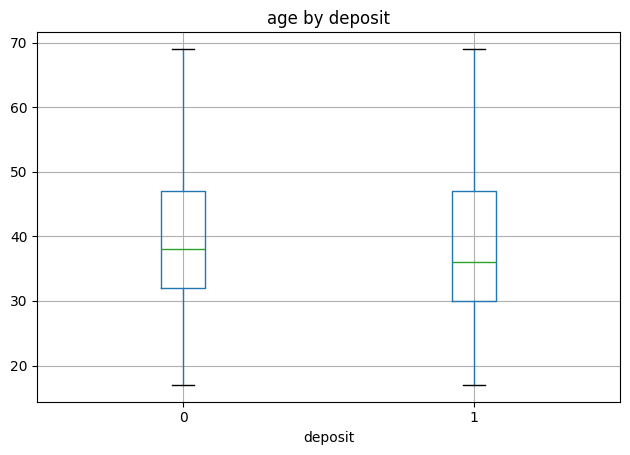

<Figure size 600x400 with 0 Axes>

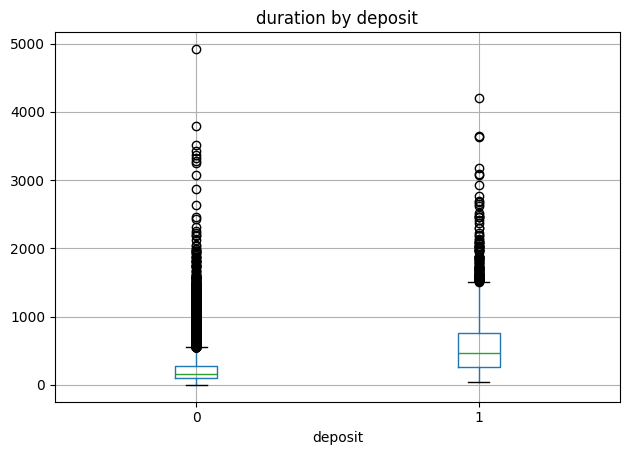

<Figure size 600x400 with 0 Axes>

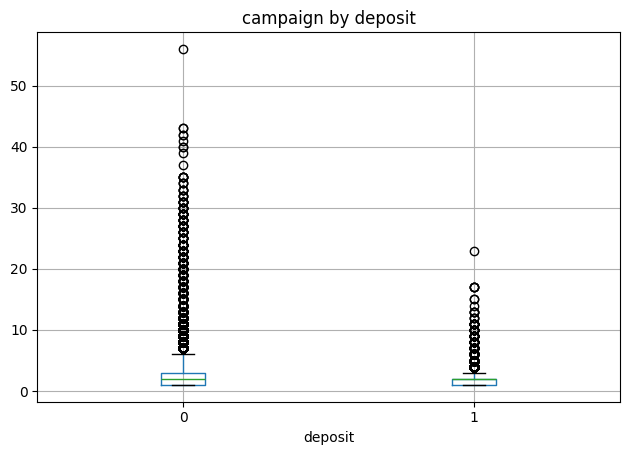

<Figure size 600x400 with 0 Axes>

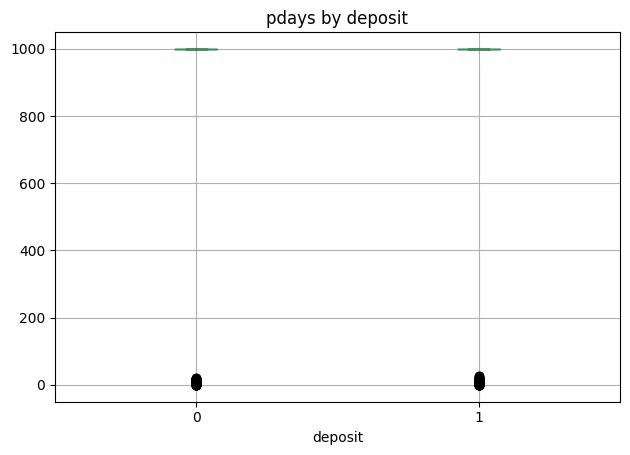

<Figure size 600x400 with 0 Axes>

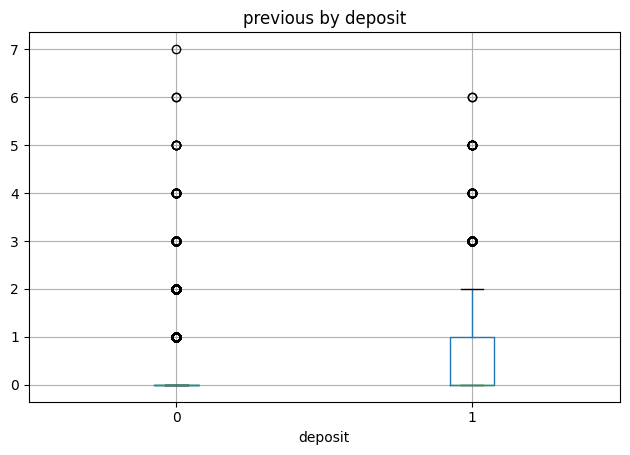

In [ ]:

import matplotlib.pyplot as plt

cols = ['age','duration','campaign','pdays','previous']
for col in cols:
    plt.figure(figsize=(6,4))
    df.boxplot(column=col, by='deposit')
    plt.title(f'{col} by deposit')
    plt.suptitle('')
    plt.tight_layout()
    plt.show()

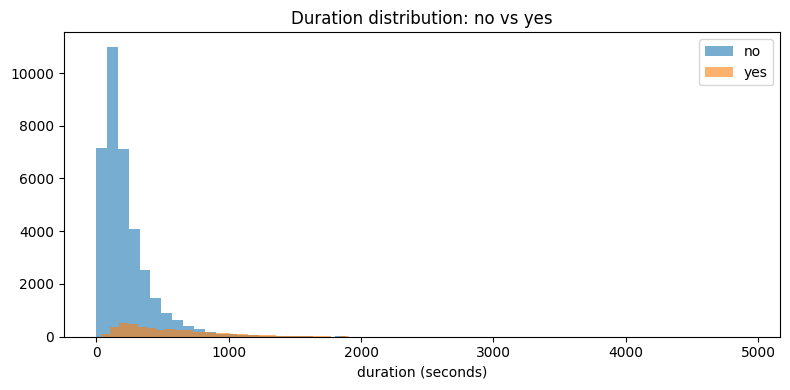

In [ ]:

plt.figure(figsize=(8,4))

df_yes = df[df['deposit'] == 1]['duration']
df_no = df[df['deposit'] == 0]['duration']

plt.hist(df_no, bins=60, alpha=0.6, label='no')
plt.hist(df_yes, bins=60, alpha=0.6, label='yes')

plt.legend()
plt.title('Duration distribution: no vs yes')
plt.xlabel('duration (seconds)')
plt.tight_layout()
plt.show()

deposit          0          1
month                        
jan       0.000000   0.000000
feb       0.000000   0.000000
mar      49.304175  50.695825
apr      80.242093  19.757907
may      93.650331   6.349669
jun      89.662328  10.337672
jul      91.227578   8.772422
aug      89.848883  10.151117
sep      54.970760  45.029240
oct      55.092593  44.907407
nov      90.351957   9.648043
dec      50.625000  49.375000


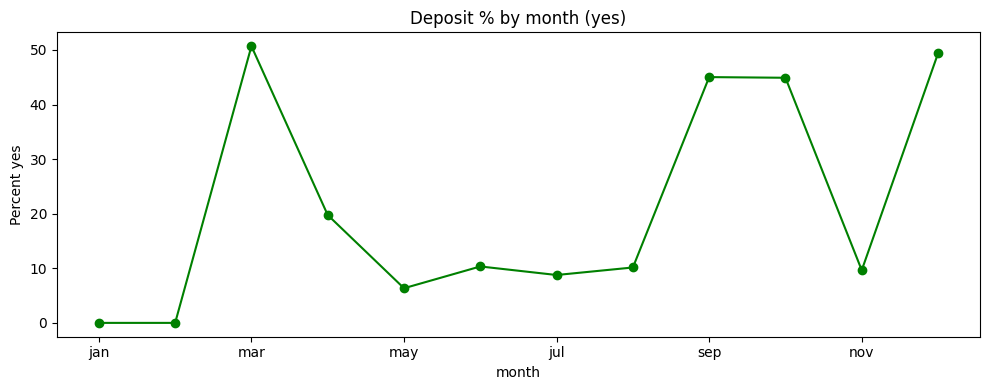

In [ ]:

months_order = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']

deposit_by_month = df.groupby('month')['deposit'].value_counts(normalize=True).unstack().fillna(0) * 100
deposit_by_month = deposit_by_month.reindex(months_order).fillna(0)

print(deposit_by_month)

plt.figure(figsize=(10,4))
deposit_by_month[1].plot(kind='line', marker='o', color='green')
plt.title('Deposit % by month (yes)')
plt.ylabel('Percent yes')
plt.tight_layout()
plt.show()

deposit              0          1
day_of_week                      
mon          90.359729   9.640271
tue          88.855459  11.144541
wed          88.710879  11.289121
thu          88.210427  11.789573
fri          89.609718  10.390282


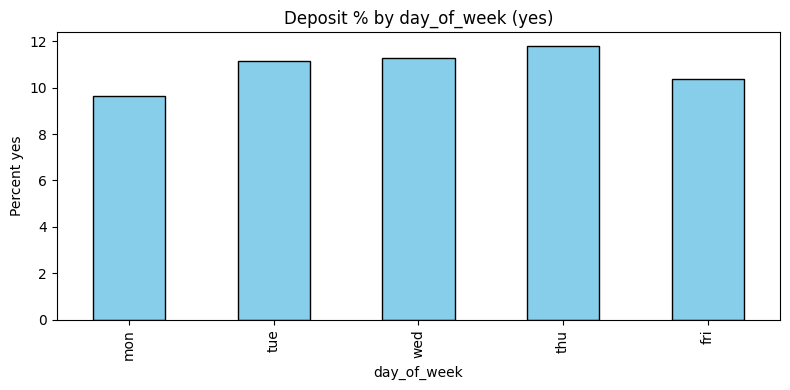

In [ ]:

order_day = ['mon','tue','wed','thu','fri']

deposit_by_day = df.groupby('day_of_week')['deposit'].value_counts(normalize=True).unstack().fillna(0) * 100
deposit_by_day = deposit_by_day.reindex(order_day).fillna(0)

print(deposit_by_day)

plt.figure(figsize=(8,4))
deposit_by_day[1].plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Deposit % by day_of_week (yes)')
plt.ylabel('Percent yes')
plt.tight_layout()
plt.show()

                       age  duration  campaign     pdays  previous  \
age               1.000000 -0.003669  0.015126  0.004492 -0.020453   
duration         -0.003669  1.000000 -0.071753 -0.047079  0.018779   
campaign          0.015126 -0.071753  1.000000  0.051268 -0.078528   
pdays             0.004492 -0.047079  0.051268  1.000000 -0.581222   
previous         -0.020453  0.018779 -0.078528 -0.581222  1.000000   
emp.var.rate      0.069025 -0.027508  0.148935  0.268217 -0.422690   
cons.price.idx    0.035754  0.004703  0.126782  0.079746 -0.210927   
cons.conf.idx     0.104384 -0.009927 -0.010334 -0.084954 -0.062801   
euribor3m         0.081958 -0.032095  0.133267  0.293115 -0.454691   
nr.employed       0.065915 -0.043543  0.142857  0.369426 -0.500628   
deposit          -0.018547  0.410729 -0.063926 -0.318967  0.222835   
balance_per_call -0.005897  0.890571 -0.270318 -0.062969  0.041536   
deposit_num      -0.018547  0.410729 -0.063926 -0.318967  0.222835   

                  e

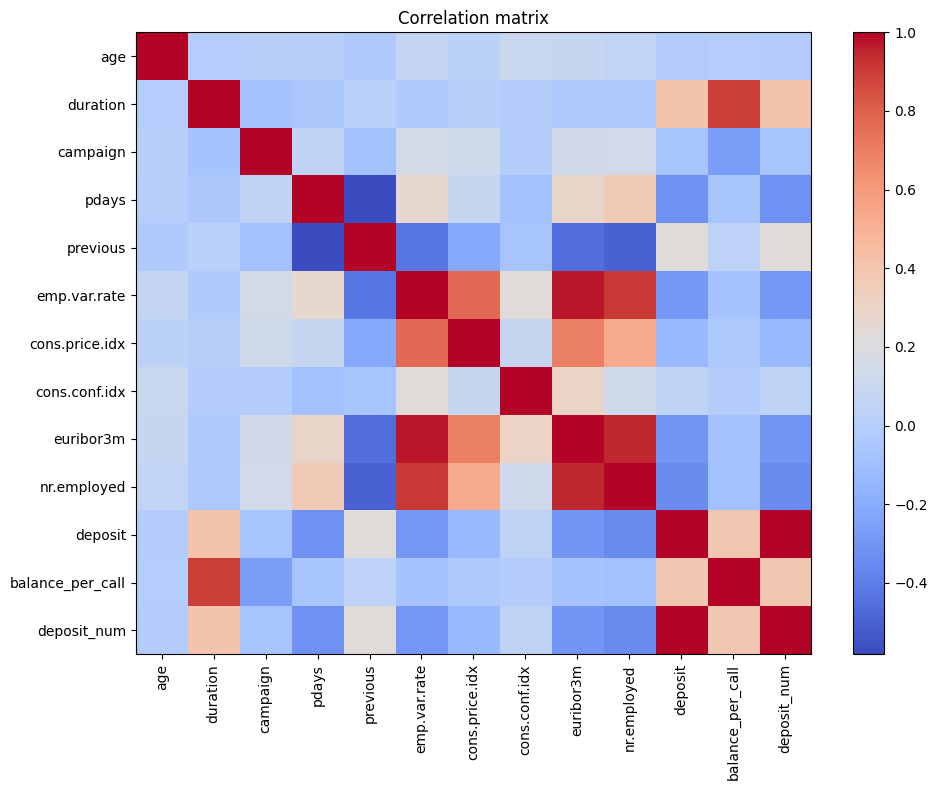

In [ ]:

import numpy as np
import matplotlib.pyplot as plt


df['deposit_num'] = df['deposit']

numeric = df.select_dtypes(include=['number']).columns.tolist()
corr = df[numeric].corr()

print(corr)

plt.figure(figsize=(10,8))
plt.imshow(corr, interpolation='none', aspect='auto', cmap='coolwarm')
plt.colorbar()
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.index)), corr.index)
plt.title('Correlation matrix')
plt.tight_layout()
plt.show()

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

X = pd.get_dummies(df.drop(columns=['deposit','deposit_num']), drop_first=True)
y = df['deposit_num']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

rf = RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1)
rf.fit(X_train, y_train)

importances = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
print(importances.head(30))

duration                           0.190946
balance_per_call                   0.137739
euribor3m                          0.078680
age                                0.060402
nr.employed                        0.052013
pdays                              0.032716
campaign                           0.030784
cons.conf.idx                      0.029298
cons.price.idx                     0.023619
emp.var.rate                       0.023562
poutcome_success                   0.023255
duration_category_medium           0.017298
housing_yes                        0.015161
previous                           0.012264
education_university.degree        0.011184
day_of_week_thu                    0.010579
day_of_week_mon                    0.010391
day_of_week_tue                    0.010181
loan_yes                           0.010125
day_of_week_wed                    0.010055
education_high.school              0.009156
contact_telephone                  0.008633
age_group_young                 

In [ ]:
!pip install dash dash-bootstrap-components plotly
import pandas as pd
import dash
from dash import dcc, html
import dash_bootstrap_components as dbc
import plotly.express as px


df = pd.read_excel("bank_additional_analysis.xlsx")

df['deposit'] = df['deposit'].map({1: 'yes', 0: 'no', 'yes': 'yes', 'no': 'no'})


df['deposit_num'] = df['deposit'].map({'yes':1,'no':0})


app = dash.Dash(__name__, external_stylesheets=[dbc.themes.BOOTSTRAP])


job_options = [{'label': j, 'value': j} for j in sorted(df['job'].unique())]
edu_options = [{'label': e, 'value': e} for e in sorted(df['education'].unique())]


app.layout = dbc.Container([
    dbc.Row([
        dbc.Col(html.H2("Bank Deposit Dashboard", className="text-center text-primary mb-4"), width=12)
    ]),
    dbc.Row([
        dbc.Col(dbc.Card([
            dbc.CardBody([
                html.H5("Total Clients", className="text-muted"),
                html.H3(id="total_clients", className="card-title")
            ])
        ], color="light"), md=4),

        dbc.Col(dbc.Card([
            dbc.CardBody([
                html.H5("Deposit YES %", className="text-muted"),
                html.H3(id="yes_percent", className="card-title text-success")
            ])
        ], color="light"), md=4),

        dbc.Col(dbc.Card([
            dbc.CardBody([
                html.H5("Deposit NO %", className="text-muted"),
                html.H3(id="no_percent", className="card-title text-danger")
            ])
        ], color="light"), md=4)
    ], className="mb-4"),
    dbc.Row([
        dbc.Col(dcc.Dropdown(id="job_filter", options=job_options, placeholder="Select Job", multi=True)),
        dbc.Col(dcc.Dropdown(id="edu_filter", options=edu_options, placeholder="Select Education", multi=True))
    ], className="mb-4"),
    dbc.Row([
        dbc.Col(dcc.Graph(id="job_chart"), md=6),
        dbc.Col(dcc.Graph(id="month_chart"), md=6)
    ]),
    dbc.Row([
        dbc.Col(dcc.Graph(id="duration_chart"), md=12)
    ])
], fluid=True)

# Callbacks
@app.callback(
    [
        dash.Output("total_clients", "children"),
        dash.Output("yes_percent", "children"),
        dash.Output("no_percent", "children"),
        dash.Output("job_chart", "figure"),
        dash.Output("month_chart", "figure"),
        dash.Output("duration_chart", "figure")
    ],
    [
        dash.Input("job_filter", "value"),
        dash.Input("edu_filter", "value")
    ]
)
def update_dashboard(selected_jobs, selected_edus):
    dff = df.copy()
    if selected_jobs:
        dff = dff[dff['job'].isin(selected_jobs)]
    if selected_edus:
        dff = dff[dff['education'].isin(selected_edus)]

    # KPIs
    total = len(dff)
    yes_pct = round((dff['deposit'] == 'yes').mean() * 100, 2)
    no_pct = round((dff['deposit'] == 'no').mean() * 100, 2)

    # Charts
    job_df = dff.groupby('job')['deposit'].value_counts(normalize=True).unstack().fillna(0) * 100
    job_df = job_df.reset_index()
    job_chart = px.bar(job_df, x='job', y='yes', title="Deposit YES % by Job", color_discrete_sequence=["#1f77b4"])

    month_order = ['jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec']
    month_df = dff.groupby('month')['deposit'].value_counts(normalize=True).unstack().fillna(0) * 100
    month_df = month_df.reindex(month_order).fillna(0).reset_index()
    month_chart = px.line(month_df, x='month', y='yes', title="Deposit YES % by Month", markers=True, color_discrete_sequence=["#ff7f0e"])

    duration_chart = px.box(dff, x='deposit', y='duration', color='deposit', title="Duration Distribution by Deposit")

    return total, f"{yes_pct}%", f"{no_pct}%", job_chart, month_chart, duration_chart

if __name__ == "__main__":
    app.run(debug=True)

<IPython.core.display.Javascript object>